In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [30]:
case_count_df=pd.read_csv('data/covid_count.csv')
case_count_df['date']=pd.to_datetime(case_count_df['Specimen Collection Date'])
cases_by_zip=case_count_df.groupby(['Zip']).sum()
cases_by_zip['ZIP'] = cases_by_zip.index
cases_by_zip['ZIP'] = cases_by_zip.loc[:, ['ZIP']].astype(float)
cases_zip_ord=cases_by_zip.sort_values(by=['Cases'], ascending=False)
cases_zip_ord.head(5)

,Cases,ZIP
Zip,,
37013.0,13354,37013.0
37211.0,10233,37211.0
37209.0,5072,37209.0
37207.0,4729,37207.0
37115.0,4574,37115.0


In [43]:
case_count_df

,Specimen Collection Date,Zip,Cases,date
0,3/6/2020,37217.0,1,2020-03-06
1,3/10/2020,37214.0,1,2020-03-10
2,3/11/2020,37013.0,1,2020-03-11
3,3/11/2020,37204.0,2,2020-03-11
4,3/11/2020,37205.0,1,2020-03-11
...,...,...,...,...
8827,3/27/2021,37210.0,1,2021-03-27
8828,3/27/2021,37211.0,1,2021-03-27
8829,3/27/2021,37212.0,1,2021-03-27
8830,3/27/2021,37214.0,2,2021-03-27


In [38]:
#GB=case_count_df.groupby([(case_count_df.date.year),(case_count_df.date.month)]).sum()

result = case_count_df.groupby([case_count_df['date'].dt.year, 
                                case_count_df['date'].dt.month,
                                case_count_df['Zip']]).agg({'Cases':sum})
result

Cases
date date Zip           
2020 3    37013.0    128
          37027.0      8
          37072.0     11
          37076.0     23
          37080.0      1
...                  ...
2021 3    37218.0     44
          37219.0     12
          37220.0     26
          37221.0    120
          37228.0     15

[384 rows x 1 columns]

<AxesSubplot:xlabel='date,date,Zip'>

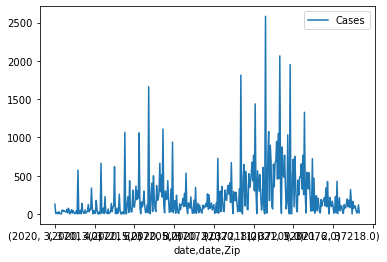

In [40]:
result.plot.line()

In [ ]:
plt.style.use('fivethirtyeight')

x = np.linspace(0, 10)

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, ax = plt.subplots()

ax.plot(x, np.sin(x) + x + np.random.randn(50))
ax.plot(x, np.sin(x) + 0.5 * x + np.random.randn(50))
ax.plot(x, np.sin(x) + 2 * x + np.random.randn(50))
ax.plot(x, np.sin(x) - 0.5 * x + np.random.randn(50))
ax.plot(x, np.sin(x) - 2 * x + np.random.randn(50))
ax.plot(x, np.sin(x) + np.random.randn(50))
ax.set_title("'fivethirtyeight' style sheet")

plt.show()

In [3]:
vaccine_count_df=pd.read_csv('data/vaccine_with_protocol.csv')
shots_by_zip=vaccine_count_df.groupby(['zipcode']).sum()
shots_by_zip['ZIP'] = shots_by_zip.index
shots_by_zip['ZIP'] = shots_by_zip.loc[:, ['ZIP']].astype(float)
shots_zip_ord=shots_by_zip.sort_values(by=['count_given'], ascending=False)
shots_zip_ord.head(5)

,count_given,dose_nbr,ZIP
zipcode,,,
37211.0,28477.0,340.0,37211.0
37221.0,27622.0,339.0,37221.0
37013.0,27167.0,329.0,37013.0
37205.0,24451.0,342.0,37205.0
37209.0,20553.0,342.0,37209.0


In [4]:
zipcodes = gpd.read_file('../geospatial-python-workshop/data/zipcodes.geojson')
zipcodes['zip'] = zipcodes.loc[:, ['zip']].astype(float)


In [5]:
case_zip_map = pd.merge(left = zipcodes, right = cases_by_zip, 
                    left_on = 'zip', right_on = 'ZIP')
case_zip_map.head()

,zip,objectid,po_name,shape_stlength,shape_starea,geometry,Cases,ZIP
0,37115.0,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ...",4574,37115.0
1,37216.0,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ...",2011,37216.0
2,37204.0,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ...",1786,37204.0
3,37027.0,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ...",231,37027.0
4,37027.0,31,BRENTWOOD,3116.4327152718852,304596.06201171875,"MULTIPOLYGON (((-86.72012 36.00886, -86.72012 ...",231,37027.0


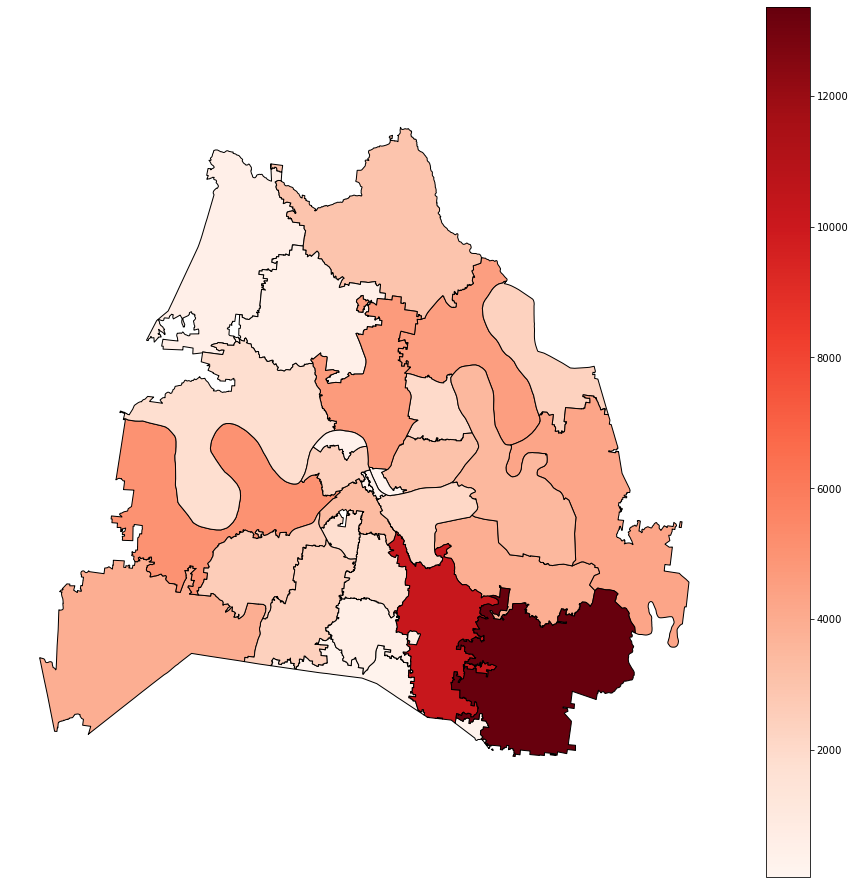

In [6]:
fig, ax = plt.subplots(figsize=(16,16))
case_zip_map.plot(column = 'Cases',
                  cmap=plt.cm.get_cmap('Reds'),
                  edgecolor = 'black',
                  legend=True,
                  ax = ax)
ax.axis('off');

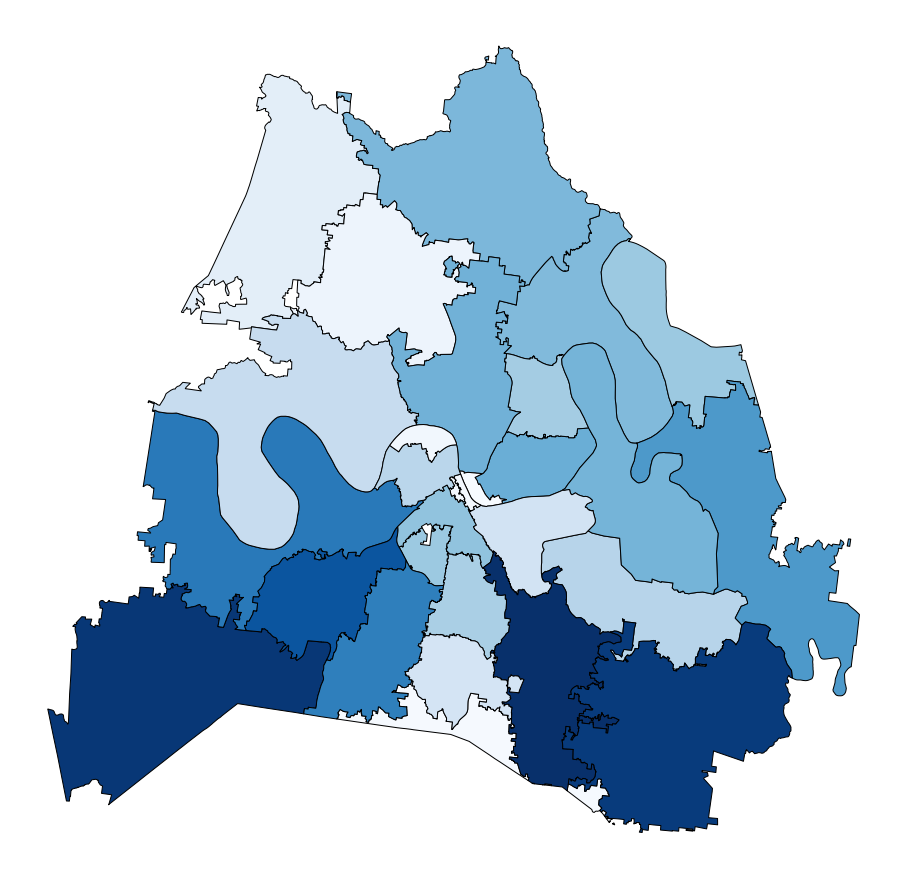

In [7]:
shot_zip_map = pd.merge(left = zipcodes, right = shots_by_zip, 
                    left_on = 'zip', right_on = 'ZIP')
fig, ax = plt.subplots(figsize=(16,16))
shot_zip_map.plot(column = 'count_given',
                  cmap=plt.cm.get_cmap('Blues'),
                  edgecolor = 'black',
                  ax = ax)
ax.axis('off');

In [8]:
pd.read_csv('data/gender_age.csv')

,geoid,name,B01001001,"B01001001, Error",B01001002,"B01001002, Error",B01001003,"B01001003, Error",B01001004,"B01001004, Error",...,B01001045,"B01001045, Error",B01001046,"B01001046, Error",B01001047,"B01001047, Error",B01001048,"B01001048, Error",B01001049,"B01001049, Error"
0,86000US37013,37013,97939,2456,47658,1617,4550,514,3786,510,...,757,193,1019,240,571,208,315,130,233,82
1,86000US37015,37015,17665,734,9112,483,527,138,681,159,...,266,93,480,102,256,92,212,82,110,52
2,86000US37027,37027,56117,765,27888,915,1561,245,2093,283,...,892,145,1145,159,748,134,538,142,280,82
3,86000US37062,37062,12185,604,5990,361,232,81,349,94,...,191,63,197,54,217,92,106,50,50,26
4,86000US37064,37064,58937,1179,27951,724,1803,299,1838,302,...,731,122,1279,198,816,189,590,200,769,304
5,86000US37072,37072,31492,763,15327,585,881,203,1131,257,...,668,137,814,197,596,145,333,107,478,120
6,86000US37073,37073,14785,692,7373,379,440,132,697,204,...,149,51,339,104,290,94,120,53,130,94
7,86000US37075,37075,65986,866,31603,745,2188,278,2046,313,...,1018,165,1398,225,874,163,663,154,725,156
8,86000US37076,37076,40161,1183,19600,774,1457,309,1273,320,...,484,111,850,160,477,139,524,141,296,96
9,86000US37080,37080,7394,587,3703,327,175,83,110,78,...,192,65,135,58,115,58,64,38,81,45


In [9]:
pd.read_csv('data/gender_ed.csv')

,geoid,name,B15002001,"B15002001, Error",B15002002,"B15002002, Error",B15002003,"B15002003, Error",B15002004,"B15002004, Error",...,B15002031,"B15002031, Error",B15002032,"B15002032, Error",B15002033,"B15002033, Error",B15002034,"B15002034, Error",B15002035,"B15002035, Error"
0,86000US37010,37010,3247,429,1514,250,0,12,0,12,...,128,81,267,88,275,114,16,25,0,12
1,86000US37012,37012,1675,243,850,193,3,5,0,12,...,90,51,71,42,9,15,0,12,0,12
2,86000US37013,37013,62355,1417,29160,992,803,201,223,142,...,3278,478,8208,853,2961,549,657,279,197,96
3,86000US37014,37014,2012,267,1000,131,9,16,0,12,...,54,43,340,119,103,57,15,23,14,22
4,86000US37015,37015,12590,508,6195,320,41,36,15,19,...,534,125,761,183,278,94,68,38,45,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,86000US38552,38552,131,76,84,64,0,12,0,12,...,0,12,3,5,0,12,0,12,0,12
114,86000US38560,38560,1042,220,470,108,9,15,0,12,...,39,27,68,42,19,18,0,12,0,12
115,86000US38563,38563,2195,306,1028,175,0,12,0,12,...,42,33,128,94,90,59,0,12,0,12
116,86000US38567,38567,536,248,276,141,0,12,0,12,...,11,16,13,19,19,22,10,16,0,12


In [10]:
pd.read_csv('data/income.csv')

,geoid,name,B19001001,"B19001001, Error",B19001002,"B19001002, Error",B19001003,"B19001003, Error",B19001004,"B19001004, Error",...,B19001013,"B19001013, Error",B19001014,"B19001014, Error",B19001015,"B19001015, Error",B19001016,"B19001016, Error",B19001017,"B19001017, Error"
0,86000US37013,37013,35597,617,1424,311,1023,239,1197,263,...,5507,593,3547,574,1703,368,1212,306,1002,326
1,86000US37015,37015,6673,279,421,164,256,101,115,60,...,903,186,639,160,294,98,157,71,84,42
2,86000US37027,37027,19950,382,460,166,173,94,246,97,...,1861,246,2167,255,1688,201,2837,295,6606,323
3,86000US37062,37062,4040,188,119,53,122,54,138,71,...,645,146,468,121,342,86,286,82,158,55
4,86000US37064,37064,21640,472,771,259,302,127,623,192,...,2293,333,2338,341,2265,353,2394,306,3857,296
5,86000US37072,37072,12533,464,534,179,412,144,456,146,...,2186,286,1120,217,784,172,652,148,486,132
6,86000US37073,37073,5425,262,233,116,151,102,169,86,...,698,164,620,143,262,81,399,148,182,71
7,86000US37075,37075,24275,559,743,173,422,134,553,161,...,3497,379,2271,292,2203,287,2004,261,2155,268
8,86000US37076,37076,17389,393,698,233,405,204,626,200,...,2648,376,1709,279,1167,183,1193,238,678,146
9,86000US37080,37080,3012,190,112,59,119,52,254,110,...,384,100,263,96,161,62,161,70,188,91


In [11]:
pd.read_csv('data/hisp.csv')

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,B03002017,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error"
0,86000US37010,37010,4966,647,4803,638,4502,664,245,170,...,20,75,0,12,53,65,0,12,53,65
1,86000US37012,37012,2185,338,2134,321,2050,321,73,75,...,0,12,0,12,4,9,0,12,4,9
2,86000US37013,37013,97939,2456,81131,2548,40080,1792,33280,2118,...,0,29,2464,757,608,315,357,221,251,222
3,86000US37014,37014,2835,382,2783,376,2682,374,18,28,...,0,12,0,12,12,19,12,19,0,12
4,86000US37015,37015,17665,734,16768,740,15842,746,304,115,...,0,19,221,114,39,39,37,39,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,86000US38552,38552,157,86,157,86,157,86,0,12,...,0,12,0,12,0,12,0,12,0,12
114,86000US38560,38560,1405,243,1405,243,1307,248,0,12,...,0,12,0,12,0,12,0,12,0,12
115,86000US38563,38563,3410,459,3410,459,3202,466,140,85,...,0,12,0,12,0,12,0,12,0,12
116,86000US38567,38567,685,288,660,291,615,286,0,12,...,0,12,0,12,25,45,25,45,0,12
